In [1]:
import numpy as np
%matplotlib inline
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import pickle

# 8-8. Data augmentation

## Overfitting

In [2]:
overfitting_log = pickle.load(open('code/08_techniques/08_8_data_augmentation/08_8_1_overfitting_log.pkl', "rb"))
train_acc = overfitting_log["accuracy_train"][-1]
test_acc = overfitting_log["accuracy_test"][-1]
print("Training accuracy:", train_acc)
print("Test accuracy:", test_acc)
print("Variance:", (train_acc - test_acc) * 100)

Training accuracy: 0.996
Test accuracy: 0.8992
Variance: 9.68


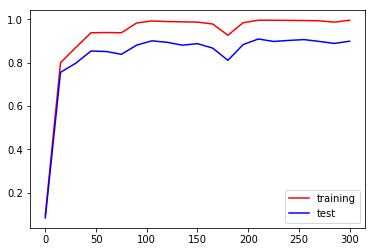

In [3]:
plt.plot(overfitting_log['accuracy_train_itr'], overfitting_log['accuracy_train'], 'r', label='training')
plt.plot(overfitting_log['accuracy_test_itr'], overfitting_log['accuracy_test'], 'b', label='test')
plt.legend()
plt.show()